In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data_or = pd.read_csv('GSPC.csv')

In [2]:
data_or.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-02-07,3335.540039,3341.419922,3322.120117,3327.709961,3327.709961,3730650000
1,2020-02-10,3318.280029,3352.260010,3317.770020,3352.090088,3352.090088,3450350000
2,2020-02-11,3365.870117,3375.629883,3352.719971,3357.750000,3357.750000,3760550000
3,2020-02-12,3370.500000,3381.469971,3369.719971,3379.449951,3379.449951,3926380000
4,2020-02-13,3365.899902,3385.090088,3360.520020,3373.939941,3373.939941,3498240000


In [3]:
# Odayago = data_or['Open'][:-1]
# today = data_or['Open'][1:]

# plt.plot(Odayago, today,'.')
# plt.xlabel('One day ago Open value')
# plt.ylabel('Today Open value')
# plt.show()

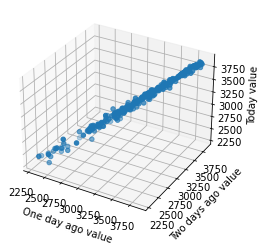

In [4]:
Odayago = data_or['Open'][1:-1]
Tdayago = data_or['Open'][:-2]
today = data_or['Open'][2:]

ax = plt.axes(projection='3d')

ax.scatter(Odayago, Tdayago, today)
ax.set_xlabel('One day ago value')
ax.set_ylabel('Two days ago value')
ax.set_zlabel('Today value')
plt.show()


In [5]:
X = np.ones((len(today),1))
X = np.c_[X, Odayago, Tdayago]
y = today

### The formula is:

$$y = X\theta$$
$$X = \left[ \begin{matrix}X_{11} & X_{12} & X_{13}\\
X_{21} & X_{22} & X_{23}\\
.. & .. & ..\\
X_{n1} & X_{n2} & X_{n3} \end{matrix}\right]
\ \ \ \ \  \theta = \left[ \begin{matrix}\theta_0\\ \theta_1\\ \theta_2\end{matrix}\right]
\ \ \ \ \  y = \left[ \begin{matrix}y_0\\ y_1\\ .. \\ y_n\end{matrix}\right]$$
$$ \theta = (X^TX)^{-1} X^T y$$


In [6]:
XTXI = np.linalg.inv(np.dot(X.transpose(),X))
theta = np.dot(XTXI,np.dot(X.transpose(),y))
print(theta)

[14.90370857  1.07510024 -0.07902805]


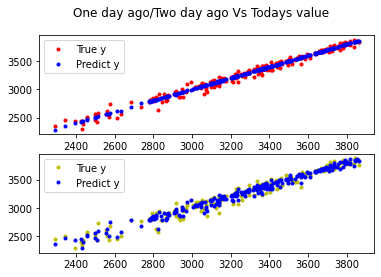

In [7]:
y_pred = np.dot(X,theta)


fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('One day ago/Two day ago Vs Todays value')

ax1.plot(X[:,1],y,'.r',label = 'True y')
ax1.plot(X[:,1],y_pred,'.b', label = 'Predict y')

ax1.legend()
ax2.plot(X[:,2],y,'.y', label = 'True y')
ax2.plot(X[:,2],y_pred,'.b', label = 'Predict y')
ax2.legend()

plt.show()